In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import sys
sys.path.append("..")

In [3]:
from src.plots import *

In [4]:
df1 = pd.read_csv('../data/ht_match.csv')

In [5]:
df2 = pd.read_csv('../data/ht_match_ind.csv')

In [6]:
df1['match_id'] = df1['match_id'].apply(lambda x: x[1:-1])

In [7]:
df1.columns

Index(['Unnamed: 0', 'match_id', 'teamId', 'win', 'firstBlood', 'firstTower',
       'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald'],
      dtype='object')

In [8]:
df1 = df1.rename(columns = {'Unnamed: 0':'teams'})
df2 = df2.rename(columns = {'Unnamed: 0':'teams'})

In [9]:
df2.head()

,teams,match_id,totalGold,level,xp,totalKills,totalDeaths,level_ups
0,0,4366059781,205374,420,207036,22,18,92
1,1,4366059781,191351,415,203735,18,22,90
2,0,4366059798,86179,210,86018,12,16,68
3,1,4366059798,96787,210,84440,16,12,68
4,0,4366059814,135641,292,129768,24,12,82


In [10]:
df1.head()

,teams,match_id,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
0,0,4366059781,1,Win,True,True,True,False,False,True
1,1,4366059781,2,Fail,False,False,False,False,True,False
2,0,4366059798,1,Fail,False,False,False,False,True,False
3,1,4366059798,2,Win,True,True,False,False,False,True
4,0,4366059814,1,Win,False,True,True,False,True,True


In [11]:
df1['teams'] = df1['teams'].astype(str)

In [12]:
mask = {'Win': 1, 'Fail': 0}
mask2 = {'0':'blue', '1': 'red'}
df1['win'] = df1['win'].replace(mask)
df1['teams'] = df1['teams'].astype(str).replace(mask2)
df2['teams'] = df2['teams'].astype(str).replace(mask2)

In [13]:
df1.drop(columns='teamId',inplace=True)

In [14]:
df1.head()

,teams,match_id,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
0,blue,4366059781,1,True,True,True,False,False,True
1,red,4366059781,0,False,False,False,False,True,False
2,blue,4366059798,0,False,False,False,False,True,False
3,red,4366059798,1,True,True,False,False,False,True
4,blue,4366059814,1,False,True,True,False,True,True


In [15]:
df1['match_id'] = df1['match_id'].astype(int)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19964 entries, 0 to 19963
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   teams            19964 non-null  object
 1   match_id         19964 non-null  int64 
 2   win              19964 non-null  int64 
 3   firstBlood       19964 non-null  bool  
 4   firstTower       19964 non-null  bool  
 5   firstInhibitor   19964 non-null  bool  
 6   firstBaron       19964 non-null  bool  
 7   firstDragon      19964 non-null  bool  
 8   firstRiftHerald  19964 non-null  bool  
dtypes: bool(6), int64(2), object(1)
memory usage: 585.0+ KB


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   teams        19998 non-null  object
 1   match_id     19998 non-null  int64 
 2   totalGold    19998 non-null  int64 
 3   level        19998 non-null  int64 
 4   xp           19998 non-null  int64 
 5   totalKills   19998 non-null  int64 
 6   totalDeaths  19998 non-null  int64 
 7   level_ups    19998 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.2+ MB


In [18]:
df = pd.merge(df1,df2, 
              how= 'inner',
             left_on= ['match_id','teams'],
             right_on= ['match_id','teams'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19962 entries, 0 to 19961
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   teams            19962 non-null  object
 1   match_id         19962 non-null  int64 
 2   win              19962 non-null  int64 
 3   firstBlood       19962 non-null  bool  
 4   firstTower       19962 non-null  bool  
 5   firstInhibitor   19962 non-null  bool  
 6   firstBaron       19962 non-null  bool  
 7   firstDragon      19962 non-null  bool  
 8   firstRiftHerald  19962 non-null  bool  
 9   totalGold        19962 non-null  int64 
 10  level            19962 non-null  int64 
 11  xp               19962 non-null  int64 
 12  totalKills       19962 non-null  int64 
 13  totalDeaths      19962 non-null  int64 
 14  level_ups        19962 non-null  int64 
dtypes: bool(6), int64(8), object(1)
memory usage: 1.6+ MB


In [20]:
eda_cols = ['teams','win', 'totalGold', 'level', 'xp', 'totalKills', 'totalDeaths', 'level_ups']

In [21]:
df_eda = df[eda_cols]

In [22]:
df_eda

,teams,win,totalGold,level,xp,totalKills,totalDeaths,level_ups
0,blue,1,205374,420,207036,22,18,92
1,red,0,191351,415,203735,18,22,90
2,blue,0,86179,210,86018,12,16,68
3,red,1,96787,210,84440,16,12,68
4,blue,1,135641,292,129768,24,12,82
...,...,...,...,...,...,...,...,...
19957,red,0,187784,426,213015,14,24,88
19958,blue,0,164501,354,164319,16,24,82
19959,red,1,177722,378,180736,24,16,90
19960,blue,0,44479,109,33567,6,8,48


In [23]:
len(df_eda)

19962

In [38]:
len(df_eda.drop_duplicates())

19681

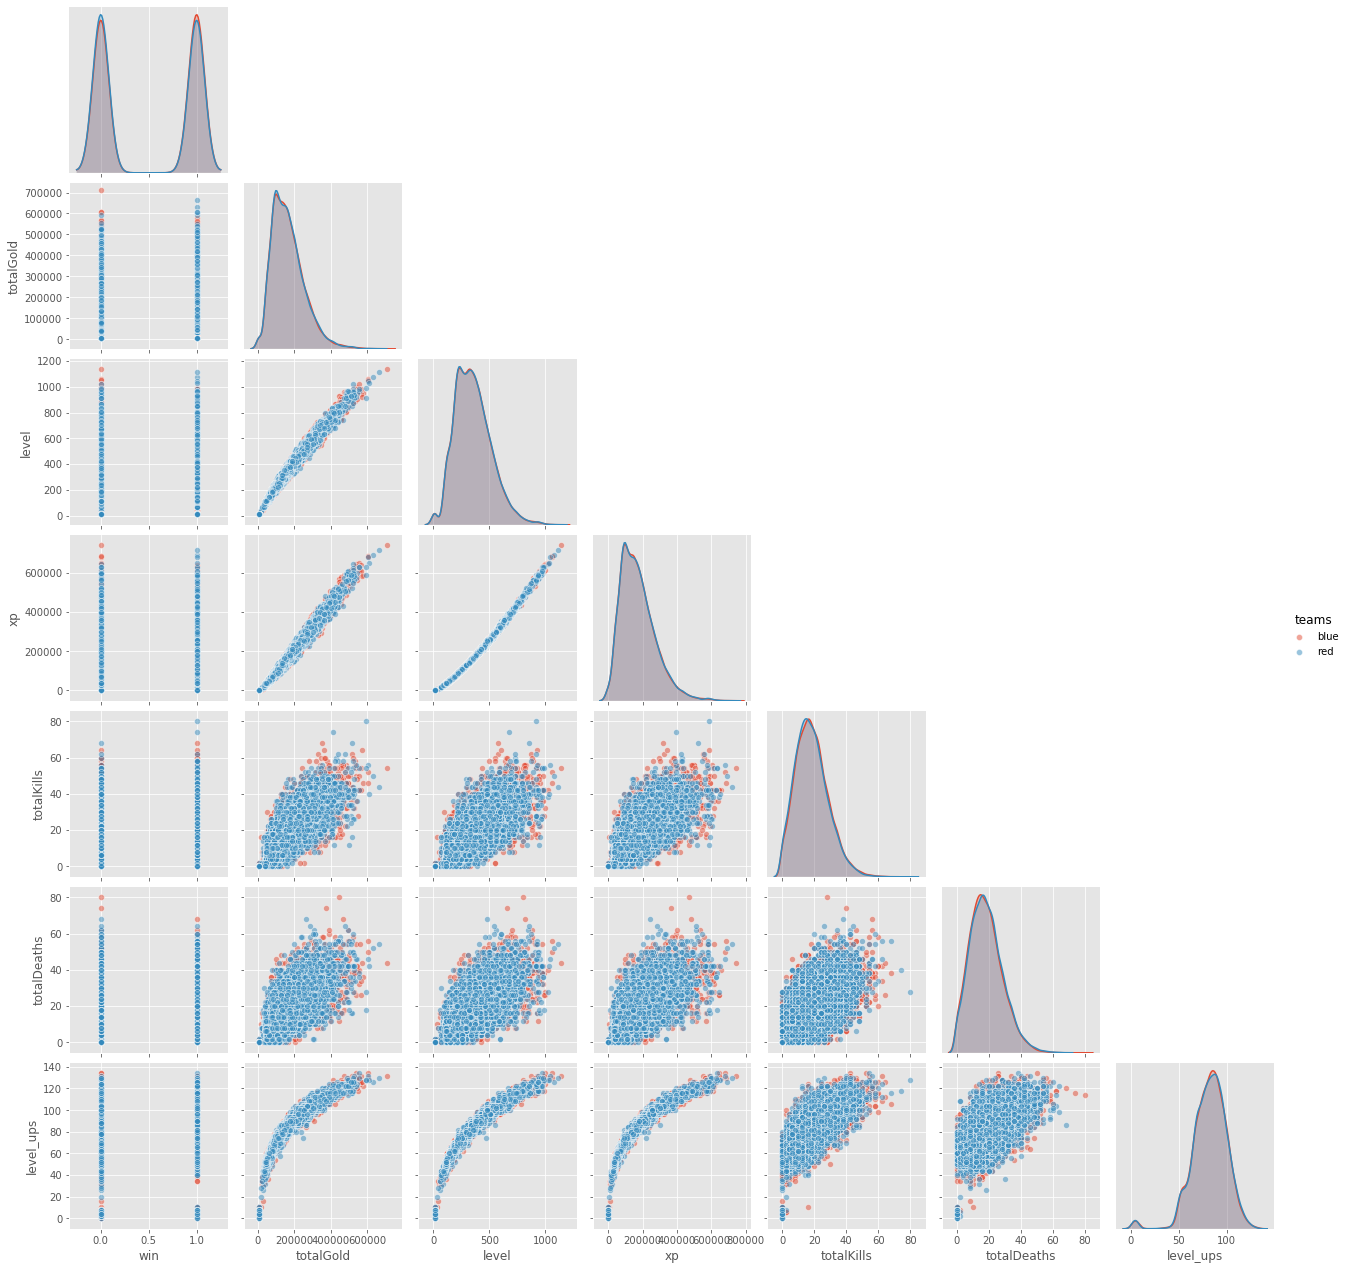

In [39]:
plt.rcParams['figure.figsize']=(16,16)
sns.pairplot(df_eda, corner = True, hue='teams',plot_kws={'alpha': 0.5})

In [25]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x = )

SyntaxError: invalid syntax (<ipython-input-25-6ddd4a9c86c1>, line 2)